In [33]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sys, os
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score
)

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

pd.set_option('display.max_columns', None)

In [17]:
df =pd.read_parquet('preprocessed_df.parquet', engine='pyarrow')

In [18]:
#X = df.sample(n=26000)
X = df.astype(int)
y = np.ravel(pd.DataFrame(X.mitre_attack_tactics))
X = X.drop("mitre_attack_tactics", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=125)

In [22]:
X

,orig_bytes,orig_pkts,history,protocol,service,dest_ip
0,3,2,14,2,1,1
1,3,2,14,2,1,1
2,3,2,14,2,1,1
3,3,2,14,2,1,1
4,3,2,14,2,1,1
...,...,...,...,...,...,...
22651903,2,5,10,1,15,1
22651904,1,5,24,1,15,1
22651905,1,5,22,1,15,1
22651906,4,5,219,1,15,1


In [36]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Naïve Bayes: ')
print(classification_report(y_test, y_pred))

Naïve Bayes: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           2       0.00      0.95      0.00      1291
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.87      0.66      0.75   2056138
           9       0.00      0.00      0.00         0
          10       0.92      0.92      0.92   2472945

    accuracy                           0.80   4530382
   macro avg       0.22      0.32      0.21   4530382
weighted avg       0.90      0.80      0.84   4530382



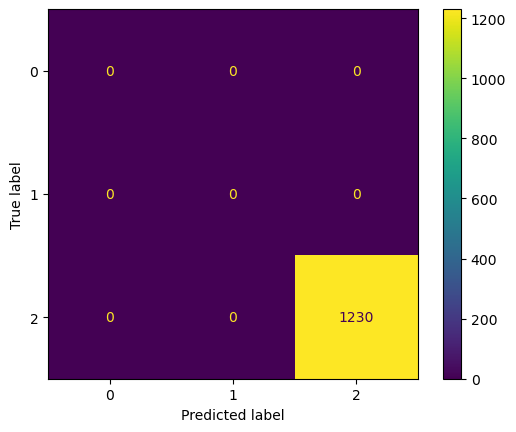

In [20]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();